In [1]:
import json

# File paths
input_file_path = 'yelp_academic_dataset_review.json'
output_file_path = 'reviews_with_wait.csv'

# Read the input file and write to the output file if 'wait' is in the text
with open(input_file_path, 'r') as input_file, open(output_file_path, 'w') as output_file:
    # Writing the header for the CSV file
    output_file.write("review_id,user_id,business_id,stars,useful,funny,cool,text,date\n")

    for line in input_file:
        review = json.loads(line)
        if 'wait' in review.get('text', '').lower():
            # Preparing the data in CSV format
            # Escaping double quotes in the text
            review_text = review.get('text', '').replace('"', '""')
            csv_line = f"{review.get('review_id','')},{review.get('user_id','')},{review.get('business_id','')},{review.get('stars','')},{review.get('useful','')},{review.get('funny','')},{review.get('cool','')},\"{review_text}\",{review.get('date','')}\n"
            output_file.write(csv_line)

output_file_path


'reviews_with_wait.csv'

In [2]:
import pandas as pd 
df = pd.read_csv("reviews_with_wait.csv")

In [99]:
time_keywords = r'\bhour\b|\bminute\b|\bhours\b|\bminutes\b'
filtered_df = df[df['text'].str.contains(time_keywords, case=False, na=False)]

In [12]:
filtered_df["text"][3]

"I was really between 3 and 4 stars for this one. I LOVE the 96th street Naked Tchopstix so I was very excited to see this one which is closer to my house.\nThe vibe is totally different as this is geared more to take out although they do have a decent size dining area. You order at the counter and they deliver it.\nMy daughter and I tried the sushi bowl. You pick up a piece of paper and  select from a choice of proteins, vegetables, rice and toppings. I like the fact that it is on paper and you don't have to guess what things are or have to shout over the counter to tell the server what you want. The sushi bowl was good but not wonderful. The choices particularly of the vegetables seemed a little too limiting and I felt I had more rice than other food items. The sauces were tasty. My husband ordered the Maui roll which is my favorite roll at the 96th street location and this just was not up that standard. It was good but the quality and consistently was not as good as at 96th street. 

In [13]:
import json
import re
import pandas as pd

time_keywords_regex = re.compile(r'\bhour\b|\bminute\b|\bhours\b|\bminutes\b', re.IGNORECASE)

# Function to check if 'wait' and time keywords are in the same sentence
def contains_wait_and_time(text):
    sentences = re.split(r'[.!?]', text)
    for sentence in sentences:
        if 'wait' in sentence.lower() and time_keywords_regex.search(sentence):
            return True
    return False


In [100]:
def first_matching_sentence(text):
    time_keywords_regex = re.compile(r'\bhour\b|\bminute\b|\bhours\b|\bminutes\b', re.IGNORECASE)
    sentences = re.split(r'[.!?]', text)
    for sentence in sentences:
        if 'wait' in sentence.lower() and time_keywords_regex.search(sentence):
            return sentence.strip()
    return None

# Apply the function to each row in the 'text' column of df
filtered_df['first_matching_sentence'] = filtered_df ['text'].apply(first_matching_sentence)

# Filter the DataFrame to keep only the rows with a matching sentence
filtered_df = filtered_df[filtered_df['first_matching_sentence'].notnull()]

/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_43827/1670563376.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['first_matching_sentence'] = filtered_df ['text'].apply(first_matching_sentence)


In [28]:
filtered_df["first_matching_sentence"][1255590]

'horrible customer service, I had to wait 20 minutes just to order my food'

In [101]:
def contains_number(sentence):
    return re.search(r'\d+', sentence) is not None

# Apply the function to each row in the 'first_matching_sentence' column of df
filtered_df['contains_number'] = filtered_df['first_matching_sentence'].apply(lambda x: contains_number(x) if pd.notna(x) else False)

# Filter the DataFrame to keep only the rows where the sentence contains a number
filtered_df = filtered_df[filtered_df['contains_number']]

In [31]:
filtered_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,first_matching_sentence,contains_number
10,ra9fNjYUumKp_iaqv-jjDg,l_izt6hn7oTxalU06mSyqg,jTI5Xjk27An8ceJ6VwpXiQ,4.0,0,0,0,"Comfortable bed, good breakfast, fast internet...",2013-08-15 15:57:09,"However, if you stay on the top floors you may...",True
12,cvQXRFLCyr0S7EgFb4lZqw,ZGjgfSvjQK886kiTzLwfLQ,EtKSTHV5Qx_Q7Aur9o4kQQ,5.0,3,1,1,"On a scale of one to things that are awesome, ...",2009-10-14 01:15:04,Took the boy for his birthday and put our name...,True
19,QS7CuOtFLuS3dnwKHRtSYQ,PBnEwGVCBL0N-bET6ZI6kQ,m5-FtgWRd4qA7j0vaOXiXQ,5.0,0,0,0,Had to wait until my third trip to NOLA to act...,2016-11-10 20:56:13,Well worth the extra $20 to not hassle with wa...,True
29,940tqxFO4Pwg_KMg4Y4Z5g,O6wkgoJqU7KMjleSlCDGaA,EQ-TZ2eeD_E0BHuvoaeG5Q,5.0,2,0,1,Milktooth is the place to go if you want a goo...,2018-01-10 01:48:58,"Trust me, it's worth the usual 30 minute wait ...",True
36,q22lpVDGRGiglEUqjdbA4A,8BWSevPgwWzMwqu_K-AdfA,P10BsKUeoeCeVoK4BS2u0w,2.0,5,0,0,I've been wanting to try Trust Me BBQ for over...,2012-05-28 17:55:04,I stopped in there about 3 months ago and wait...,True
...,...,...,...,...,...,...,...,...,...,...,...
1255590,ZgMFhqwQze4gLJJqUevgqg,eE5cGP32rTKr8IiBLSYevw,aK6R2akvIK9ijw3FvDy8vw,1.0,0,0,0,"this place sucks. horrible customer service, I...",2018-04-07 02:15:25,"horrible customer service, I had to wait 20 mi...",True
1255592,GyNfq7-l6-EazOLcehVvmQ,30mLJI_M7Jcel0eFKKm_kA,DnuRO4i1yI5REm5v1pUxWQ,1.0,1,0,0,First of all I made a phone order and still ha...,2021-08-17 22:12:58,First of all I made a phone order and still ha...,True
1255597,Q6h57S-h4-ND2slRKUg1wg,VjiqLNphmE322B7rDuNoSQ,e3BJXpNS5pjcdXycdxagJw,1.0,0,0,0,I only went here for Dr Shah for about 8 years...,2020-03-10 16:58:16,So I go for a cleaning today and an hour and 1...,True
1255602,r1s8DYA_zlYUXNxDHDOj9Q,ZtQr5DOhdD0yCJxal6oqlQ,cn3GfkDkzhwWBKDNgsiQLA,1.0,2,1,0,Service should be in the negatives - Arrived 1...,2013-04-06 03:24:15,I called them after waiting 45 minutes and the...,True


In [102]:
import pandas as pd
import re

# Assuming df is your existing DataFrame
# ...

# Define a function to find the closest number before 'minutes/minute' and 'hours/hour' separately
def find_closest_numbers(sentence):
    # Regular expressions for finding the nearest number before 'minutes/minute' and 'hours/hour'
    pattern_minutes = re.compile(r'(\d+)\s*(minutes|minute)\b', re.IGNORECASE)
    pattern_hours = re.compile(r'(\d+)\s*(hours|hour)\b', re.IGNORECASE)
    
    # Find matches for minutes and hours
    matches_minutes = pattern_minutes.findall(sentence)
    matches_hours = pattern_hours.findall(sentence)

    # Extract numbers if matches are found
    closest_number_minutes = matches_minutes[0][0] if matches_minutes else None
    closest_number_hours = matches_hours[0][0] if matches_hours else None

    return closest_number_minutes, closest_number_hours

# Apply the function to each row in the 'first_matching_sentence' column of df
filtered_df[['closest_number_minutes', 'closest_number_hours']] = filtered_df['first_matching_sentence'].apply(
    lambda x: find_closest_numbers(x) if pd.notna(x) else (None, None)
).tolist()

# Now df has two additional columns 'closest_number_minutes' and 'closest_number_hours'


In [34]:
filtered_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,first_matching_sentence,contains_number,closest_number_minutes,closest_number_hours
10,ra9fNjYUumKp_iaqv-jjDg,l_izt6hn7oTxalU06mSyqg,jTI5Xjk27An8ceJ6VwpXiQ,4.0,0,0,0,"Comfortable bed, good breakfast, fast internet...",2013-08-15 15:57:09,"However, if you stay on the top floors you may...",True,15,None
12,cvQXRFLCyr0S7EgFb4lZqw,ZGjgfSvjQK886kiTzLwfLQ,EtKSTHV5Qx_Q7Aur9o4kQQ,5.0,3,1,1,"On a scale of one to things that are awesome, ...",2009-10-14 01:15:04,Took the boy for his birthday and put our name...,True,45,None
19,QS7CuOtFLuS3dnwKHRtSYQ,PBnEwGVCBL0N-bET6ZI6kQ,m5-FtgWRd4qA7j0vaOXiXQ,5.0,0,0,0,Had to wait until my third trip to NOLA to act...,2016-11-10 20:56:13,Well worth the extra $20 to not hassle with wa...,True,None,None
29,940tqxFO4Pwg_KMg4Y4Z5g,O6wkgoJqU7KMjleSlCDGaA,EQ-TZ2eeD_E0BHuvoaeG5Q,5.0,2,0,1,Milktooth is the place to go if you want a goo...,2018-01-10 01:48:58,"Trust me, it's worth the usual 30 minute wait ...",True,30,None
36,q22lpVDGRGiglEUqjdbA4A,8BWSevPgwWzMwqu_K-AdfA,P10BsKUeoeCeVoK4BS2u0w,2.0,5,0,0,I've been wanting to try Trust Me BBQ for over...,2012-05-28 17:55:04,I stopped in there about 3 months ago and wait...,True,10,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255590,ZgMFhqwQze4gLJJqUevgqg,eE5cGP32rTKr8IiBLSYevw,aK6R2akvIK9ijw3FvDy8vw,1.0,0,0,0,"this place sucks. horrible customer service, I...",2018-04-07 02:15:25,"horrible customer service, I had to wait 20 mi...",True,20,None
1255592,GyNfq7-l6-EazOLcehVvmQ,30mLJI_M7Jcel0eFKKm_kA,DnuRO4i1yI5REm5v1pUxWQ,1.0,1,0,0,First of all I made a phone order and still ha...,2021-08-17 22:12:58,First of all I made a phone order and still ha...,True,20,None
1255597,Q6h57S-h4-ND2slRKUg1wg,VjiqLNphmE322B7rDuNoSQ,e3BJXpNS5pjcdXycdxagJw,1.0,0,0,0,I only went here for Dr Shah for about 8 years...,2020-03-10 16:58:16,So I go for a cleaning today and an hour and 1...,True,15,None
1255602,r1s8DYA_zlYUXNxDHDOj9Q,ZtQr5DOhdD0yCJxal6oqlQ,cn3GfkDkzhwWBKDNgsiQLA,1.0,2,1,0,Service should be in the negatives - Arrived 1...,2013-04-06 03:24:15,I called them after waiting 45 minutes and the...,True,45,None


In [103]:
filtered_df["closest_number_minutes"] = filtered_df["closest_number_minutes"] if filtered_df["closest_number_minutes"].isna() == False else 0

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [104]:
filtered_df["closest_number_minutes"] = filtered_df["closest_number_minutes"].fillna(0)
filtered_df["closest_number_hours"] = filtered_df["closest_number_hours"].fillna(0)

In [105]:
filtered_df["manual_hour"] = 0

for key, row in filtered_df.iterrows():
    pattern = re.compile(r'(\b\w+)\s+(hours|hour)\b', re.IGNORECASE)
    
    match = pattern.search(row["first_matching_sentence"])
    if match:
        # Return the word before 'hour'/'hours'
        word = match.group(1)

        if (word in ("an", "a", "one", "whole", "entire", "full")):
            filtered_df.at[key, "manual_hour"] = 1
        elif (word in ("half")):
            filtered_df.at[key, "manual_hour"] = 0.5
        elif (word in ("quarter")):
            filtered_df.at[key, "manual_hour"] = 0.25
        else:
            try:
                filtered_df.at[key, "manual_hour"] = w2n.word_to_num(word)
            except ValueError:
                # If conversion fails, set the value to 0
                filtered_df.at[key, "manual_hour"] = 0
            
    

/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_43827/2733220049.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  filtered_df.at[key, "manual_hour"] = 0.5


In [57]:
filtered_df["manual_hour"]

10         0.0
12         0.0
19         1.0
29         0.0
36         0.0
          ... 
1255590    0.0
1255592    0.0
1255597    1.0
1255602    0.0
1255604    0.0
Name: manual_hour, Length: 183971, dtype: float64

In [51]:
import numpy as np
np.max(df["manual_hour"])

1

In [43]:
from word2number import w2n

print(w2n.word_to_num("one hour"))

1


In [58]:
def extract_between_time_units(sentence):
    # Regular expression to match the required pattern
    pattern = re.compile(r'(hours|hour)\s+(.*?)\s+(minutes|minute)', re.IGNORECASE)
    match = pattern.search(sentence)

    if match:
        # Return the word(s) between 'hour/hours' and 'minutes/minute'
        return match.group(2)
    else:
        # If 'hour/hours' is not found, find 'minutes/minute' and return everything before it
        minutes_pattern = re.compile(r'^(.*?)\s+(minutes|minute)', re.IGNORECASE)
        minutes_match = minutes_pattern.search(sentence)
        if minutes_match:
            return minutes_match.group(1)

    return None

In [59]:
for key, row in filtered_df.iterrows():
    word = extract_between_time_units(row["first_matching_sentence"])
    if word is not None:
        try:
            filtered_df.at[key, "manual_minute"] = w2n.word_to_num(word)
        except ValueError:
            # If conversion fails, set the value to 0
            filtered_df.at[key, "manual_minute"] = 0

/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_43827/63554530.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.at[key, "manual_minute"] = 0


In [106]:
filtered_df.fillna(0)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,manual_hour,first_matching_sentence,contains_number,closest_number_minutes,closest_number_hours
10,ra9fNjYUumKp_iaqv-jjDg,l_izt6hn7oTxalU06mSyqg,jTI5Xjk27An8ceJ6VwpXiQ,4.0,0,0,0,"Comfortable bed, good breakfast, fast internet...",2013-08-15 15:57:09,0.0,"However, if you stay on the top floors you may...",True,15,0
12,cvQXRFLCyr0S7EgFb4lZqw,ZGjgfSvjQK886kiTzLwfLQ,EtKSTHV5Qx_Q7Aur9o4kQQ,5.0,3,1,1,"On a scale of one to things that are awesome, ...",2009-10-14 01:15:04,0.0,Took the boy for his birthday and put our name...,True,45,0
19,QS7CuOtFLuS3dnwKHRtSYQ,PBnEwGVCBL0N-bET6ZI6kQ,m5-FtgWRd4qA7j0vaOXiXQ,5.0,0,0,0,Had to wait until my third trip to NOLA to act...,2016-11-10 20:56:13,1.0,Well worth the extra $20 to not hassle with wa...,True,0,0
29,940tqxFO4Pwg_KMg4Y4Z5g,O6wkgoJqU7KMjleSlCDGaA,EQ-TZ2eeD_E0BHuvoaeG5Q,5.0,2,0,1,Milktooth is the place to go if you want a goo...,2018-01-10 01:48:58,0.0,"Trust me, it's worth the usual 30 minute wait ...",True,30,0
36,q22lpVDGRGiglEUqjdbA4A,8BWSevPgwWzMwqu_K-AdfA,P10BsKUeoeCeVoK4BS2u0w,2.0,5,0,0,I've been wanting to try Trust Me BBQ for over...,2012-05-28 17:55:04,0.0,I stopped in there about 3 months ago and wait...,True,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255590,ZgMFhqwQze4gLJJqUevgqg,eE5cGP32rTKr8IiBLSYevw,aK6R2akvIK9ijw3FvDy8vw,1.0,0,0,0,"this place sucks. horrible customer service, I...",2018-04-07 02:15:25,0.0,"horrible customer service, I had to wait 20 mi...",True,20,0
1255592,GyNfq7-l6-EazOLcehVvmQ,30mLJI_M7Jcel0eFKKm_kA,DnuRO4i1yI5REm5v1pUxWQ,1.0,1,0,0,First of all I made a phone order and still ha...,2021-08-17 22:12:58,0.0,First of all I made a phone order and still ha...,True,20,0
1255597,Q6h57S-h4-ND2slRKUg1wg,VjiqLNphmE322B7rDuNoSQ,e3BJXpNS5pjcdXycdxagJw,1.0,0,0,0,I only went here for Dr Shah for about 8 years...,2020-03-10 16:58:16,1.0,So I go for a cleaning today and an hour and 1...,True,15,0
1255602,r1s8DYA_zlYUXNxDHDOj9Q,ZtQr5DOhdD0yCJxal6oqlQ,cn3GfkDkzhwWBKDNgsiQLA,1.0,2,1,0,Service should be in the negatives - Arrived 1...,2013-04-06 03:24:15,0.0,I called them after waiting 45 minutes and the...,True,45,0


In [107]:
filtered_df['closest_number_minutes'] = pd.to_numeric(filtered_df['closest_number_minutes'], errors='coerce')
filtered_df['manual_hour'] = pd.to_numeric(filtered_df['manual_hour'], errors='coerce')
filtered_df['closest_number_hours'] = pd.to_numeric(filtered_df['closest_number_hours'], errors='coerce')

# You can fill NaN values with 0 if that makes sense for your context
filtered_df['closest_number_minutes'].fillna(0, inplace=True)
filtered_df['manual_hour'].fillna(0, inplace=True)
filtered_df['closest_number_hours'].fillna(0, inplace=True)


In [108]:
filtered_df["total_time"] = 1.0 * (filtered_df["closest_number_minutes"] ) / 60 + filtered_df["manual_hour"] + filtered_df["closest_number_hours"]

In [109]:
filtered_df.to_csv("filtered_text_time.csv")

In [68]:
filtered_df[filtered_df["manual_minute"] > 0]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,first_matching_sentence,contains_number,closest_number_minutes,closest_number_hours,manual_hour,manual_minute
343,6loXV3OpMPvzCPf2R-e6-g,5EGs7LX3Z8ZogvOOgNLsnA,Im4IDA9RXycirW_EZqAj5Q,2.0,0,0,0,We heard that Fresh Market was open and since...,2016-03-30 21:54:49,"However, it does downhill from this point on: ...",True,5,0,0.0,0.1
406,38fmuDvBObd4RK1Du5wL6w,1rCHXX_vYWmseZ9nZ69NwA,3wogQmKw729tKKWaVbZvbg,1.0,1,0,0,Worst of the worst. Ordered three items and wa...,2017-01-14 23:18:36,Ordered three items and waited 40 minutes for ...,True,40,0,0.0,3.0
484,_RY_d-PAKawrga-_hha5UQ,gbg_h4hkvANBKhPWCz6ZnA,haTwYzufFqFb2sq6CHwOEQ,1.0,0,0,0,This place is terrible. They wouldn't serve me...,2017-12-16 05:24:11,We ended up waiting for our shitball ass food ...,True,45,2,2.0,1.0
490,1WFRWOUQjfl0R2eH6veBnQ,C3g8rpjTzTdxmujnHaR1Tw,ThZyytdc_kj2uBYFiSao-A,1.0,0,0,0,I wish I could give zero stars to this poor ex...,2015-05-12 18:34:02,5 minutes later the waitress reappeared and I ...,True,5,0,0.0,5.0
721,52hNL2d2QMk2-63SzusvWw,N7F3SOwuvptKqFi5O5ix3Q,jW4a3W9-UkFxpglHvo_Kqg,1.0,7,4,2,3.5 stars for the food. A big fat Zero 0.0 fo...,2013-08-04 00:09:09,"8 minutes after her soup was served, and midwa...",True,8,0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254977,Y2E0MckUUR_5LsqqeLGRNg,N-aBdp2M6Bagq0dxw6uZ1A,-vbwCzRFySlWqvklQLd5zQ,1.0,0,0,0,"First off, this is the first bad review I have...",2017-09-01 16:05:38,We called again two days later and the technic...,True,0,0,0.0,2.0
1254988,fPSevMyxUHh_2Whn5OPglw,CtXVj23D4KqPeBuYHEGVUg,a5TaDLChZDSgZ-en1sxNpw,2.0,4,3,2,My first visit to the Golden Arches in yeeeeee...,2019-01-15 02:05:31,I was pretty frustrated and my grandson was ve...,True,30,0,0.0,1.0
1255011,WEnT_ZZ9en5ncvKbXMM8IA,p6gWhkGUCpOHS6yt-RueZw,JpKKLxLo_6RxvQXyjVXnvQ,5.0,0,1,0,Ate here after a show at the HiFi Annex. The ...,2021-09-28 22:26:24,"20 minutes after we showed up, it went to all ...",True,20,0,0.0,20.0
1255108,rLajgpH-BGBtKXk6pydJgA,VU_iMC9xrM3PvobEAZhTHA,OhxH_vLWKwSohst8h0G3hA,1.0,2,1,0,Horrible horrible horrible customer service. I...,2021-03-10 15:44:49,"I went inside, there was one person in line ah...",True,10,0,0.0,8.0


In [69]:
filtered_df["first_matching_sentence"][484]

'We ended up waiting for our shitball ass food for 2 hours and one 8 oz drink took us 45 minutes'

In [73]:
filtered_df["total_time"] 

10         0.250000
12         0.750000
19         1.000000
29         0.500000
36         0.166667
             ...   
1255590    0.333333
1255592    0.333333
1255597    1.250000
1255602    0.750000
1255604    0.250000
Name: total_time, Length: 183971, dtype: float64

In [115]:
filtered_df = filtered_df[filtered_df["total_time"] > 0]
filtered_df = filtered_df[filtered_df["total_time"] < 3 ]

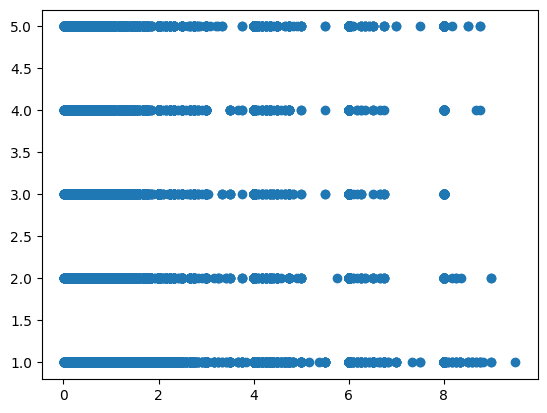

In [111]:
import matplotlib.pyplot as plt
plt.scatter(filtered_df["total_time"], filtered_df["stars"] )

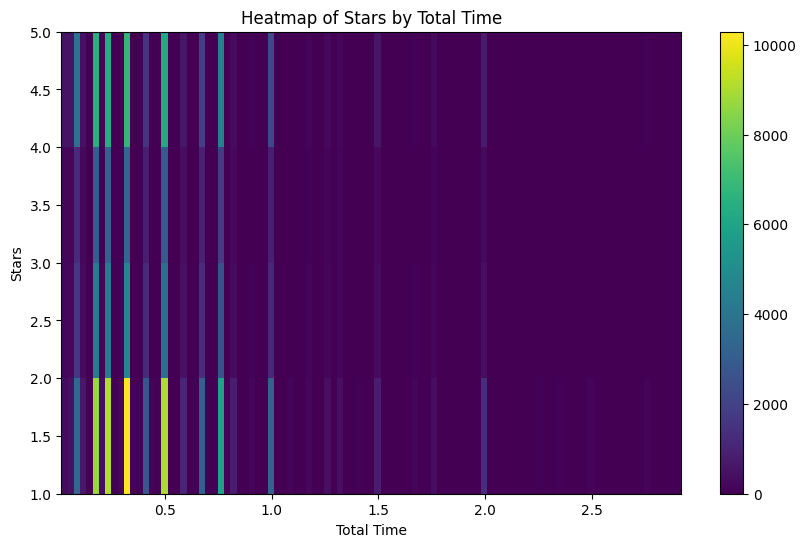

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'stars' is a discrete variable with values like 1, 2, 3, etc.
# and 'total_time' is continuous.

# Define the bins for 'total_time'
time_bins = np.linspace(filtered_df['total_time'].min(), filtered_df['total_time'].max(), 100)  # Adjust the number of bins as needed
star_bins = np.arange(filtered_df['stars'].min(), filtered_df['stars'].max() + 1)  # Plus 1 to include the max value

# Create 2D histogram
H, xedges, yedges = np.histogram2d(filtered_df['total_time'], filtered_df['stars'], bins=(time_bins, star_bins))

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.pcolormesh(xedges, yedges, H.T, shading='auto')  # Transpose H to align with the axes

# Add color bar to show the scale
plt.colorbar()

# Add labels and title
plt.xlabel('Total Time')
plt.ylabel('Stars')
plt.title('Heatmap of Stars by Total Time')

# Show the plot
plt.show()


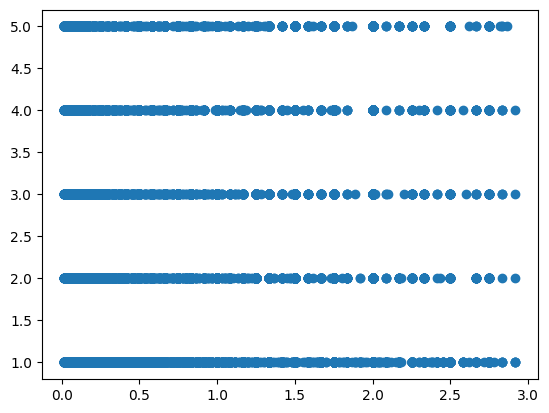

In [117]:

plt.scatter(filtered_df["total_time"], filtered_df["stars"] )

/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_43827/3232539825.py:20: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(X, Y, 1)


AttributeError: module 'matplotlib.pyplot' has no attribute 'sho'

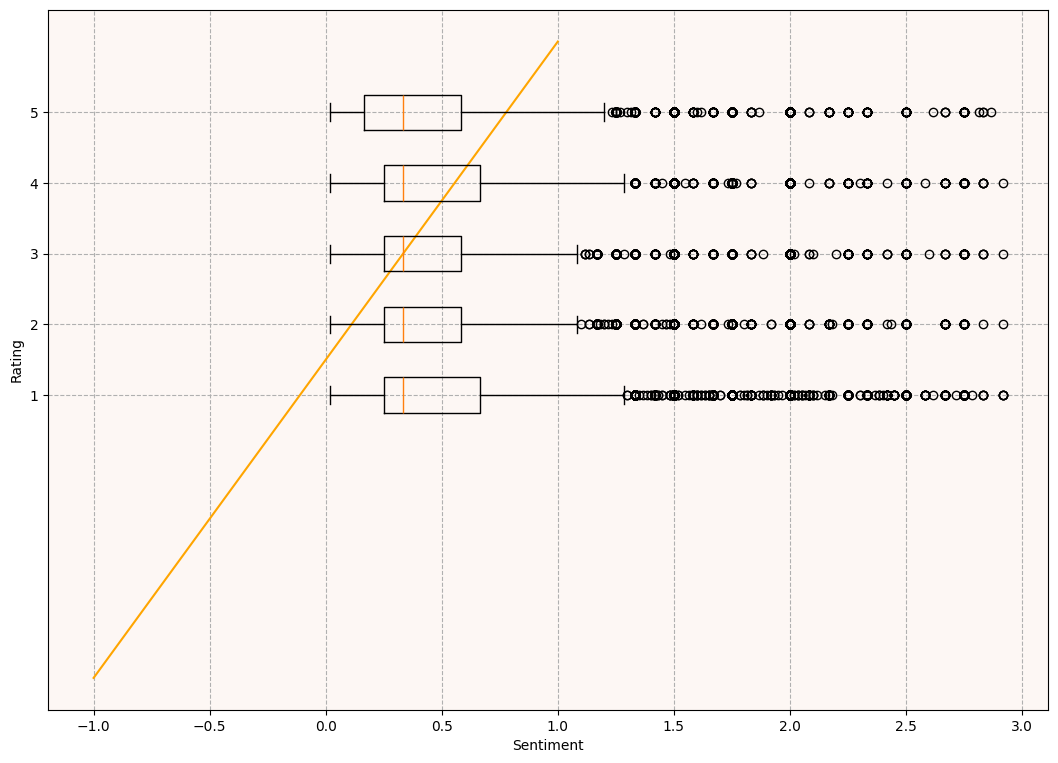

In [119]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
np.random.seed(10)
 
data_1 = np.array(filtered_df[filtered_df["stars"] == 1]["total_time"])
data_2 = np.array(filtered_df[filtered_df["stars"] == 2]["total_time"])
data_3 = np.array(filtered_df[filtered_df["stars"] == 3]["total_time"])
data_4 = np.array(filtered_df[filtered_df["stars"] == 4]["total_time"])
data_5 = np.array(filtered_df[filtered_df["stars"] == 5]["total_time"])

data = [data_1, data_2, data_3, data_4, data_5]

X = np.array([ np.median(data_1),  np.median(data_2),  np.median(data_3),  np.median(data_4),  np.median(data_5)])
Y = np.array([1,2,3,4,5])

m, b = np.polyfit(X, Y, 1)

 
fig = plt.figure(figsize =(10, 7))


ax = fig.add_axes([0, 0, 1, 1], facecolor= '#FDF7F4')
X = np.array([-1,1])


ax.plot(X, m*X + b, color='orange', label=f'Linear Fit: y = {m:.2f}x + {b:.2f}')
bp = ax.boxplot(data, vert = 0)


plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.grid(True, linestyle='--')
plt.sho

#plt.xlim()
plt.ylim(0,6)

# show plot
plt.show()

In [120]:
from textblob import TextBlob
for key, row in filtered_df.iterrows():
    blob = TextBlob(row['text'])
    filtered_df.at[key, 'sentiment'] = blob.sentiment.polarity

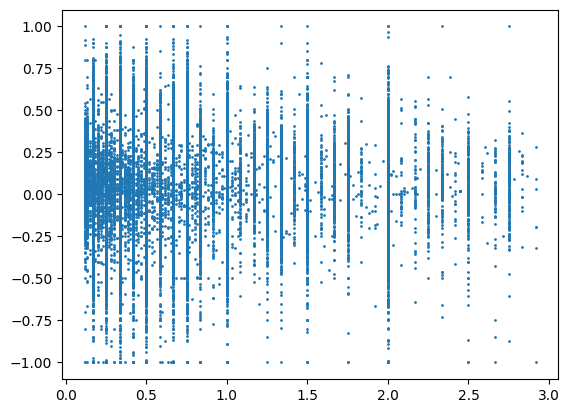

In [123]:
limit_df = filtered_df[filtered_df["total_time"] > 0.1]
plt.scatter(limit_df["total_time"], limit_df["sentiment"], s = 1)

In [126]:
filtered_df = filtered_df[filtered_df['categories'].str.contains('Restaurants', case=False, na=False)]
plt.scatter(limit_df["total_time"], limit_df["sentiment"], s = 1)

KeyError: 'categories'

In [127]:
import json
data = []
with open('yelp_academic_dataset_business.json', 'r') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)
filtered_business = df[df['categories'].str.contains('Restaurants', case=False, na=False)]

In [128]:
filtered_df1 = filtered_df[filtered_df['business_id'].isin(filtered_business['business_id'])]

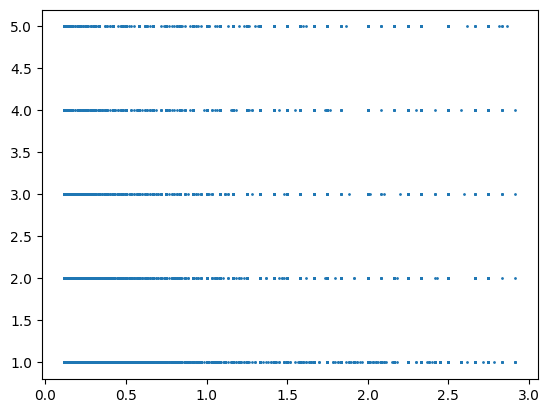

In [131]:
filtered_df = filtered_df[filtered_df["total_time"] > 0.1]
plt.scatter(filtered_df["total_time"], filtered_df["stars"], s= 1 )

/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_43827/2172213493.py:20: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=combined_data, x='stars', hue='Source', split=True, inner="quartile", scale="count")


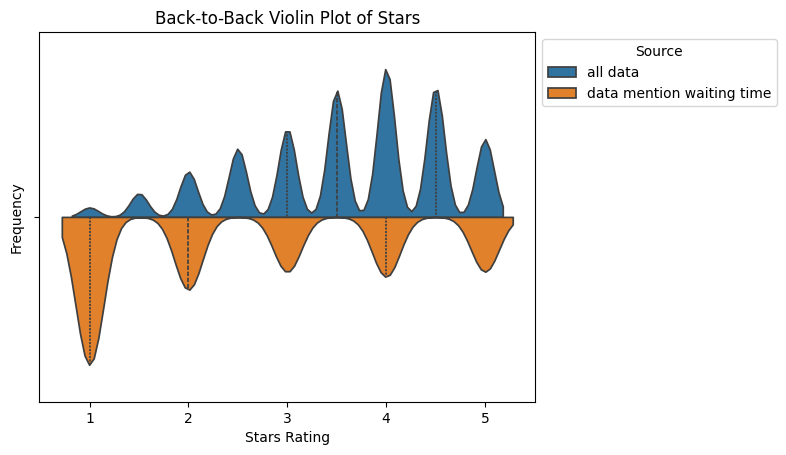

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' and 'df1' are your DataFrames and have a 'stars' column

# Combine the 'stars' columns from both dataframes into a single dataframe for plotting
# Add an indicator for the source DataFrame

df1 = df
df2 = filtered_df1

df1['Source'] = 'all data'
df2['Source'] = 'data mention waiting time'


combined_data = pd.concat([df1, df2], axis=0)

# Now we plot the back-to-back violin plot using seaborn
sns.violinplot(data=combined_data, x='stars', hue='Source', split=True, inner="quartile", scale="count")

# Set the titles and labels
plt.title('Back-to-Back Violin Plot of Stars')
plt.xlabel('Stars Rating')
plt.ylabel('Frequency')

# If you want to show the legend outside the plot
plt.legend(title='Source', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()


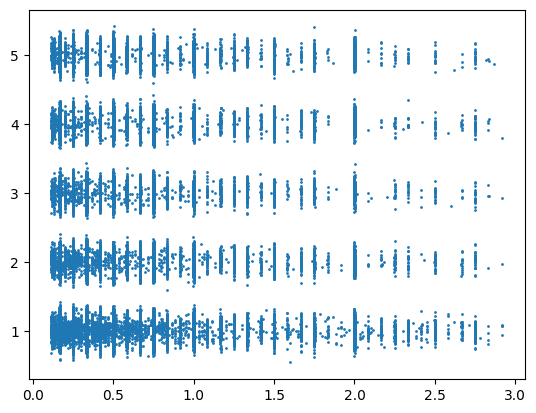

In [141]:
jittered_star = filtered_df["stars"] + np.random.normal(0, 0.1, size=len(filtered_df))
jittered_time = filtered_df["total_time"] + np.random.normal(0, 0.001, size=len(filtered_df))
plt.scatter(jittered_time,jittered_star, s=1)

In [ ]:
filtered_df_1

AttributeError: module 'matplotlib.pyplot' has no attribute 'sho'

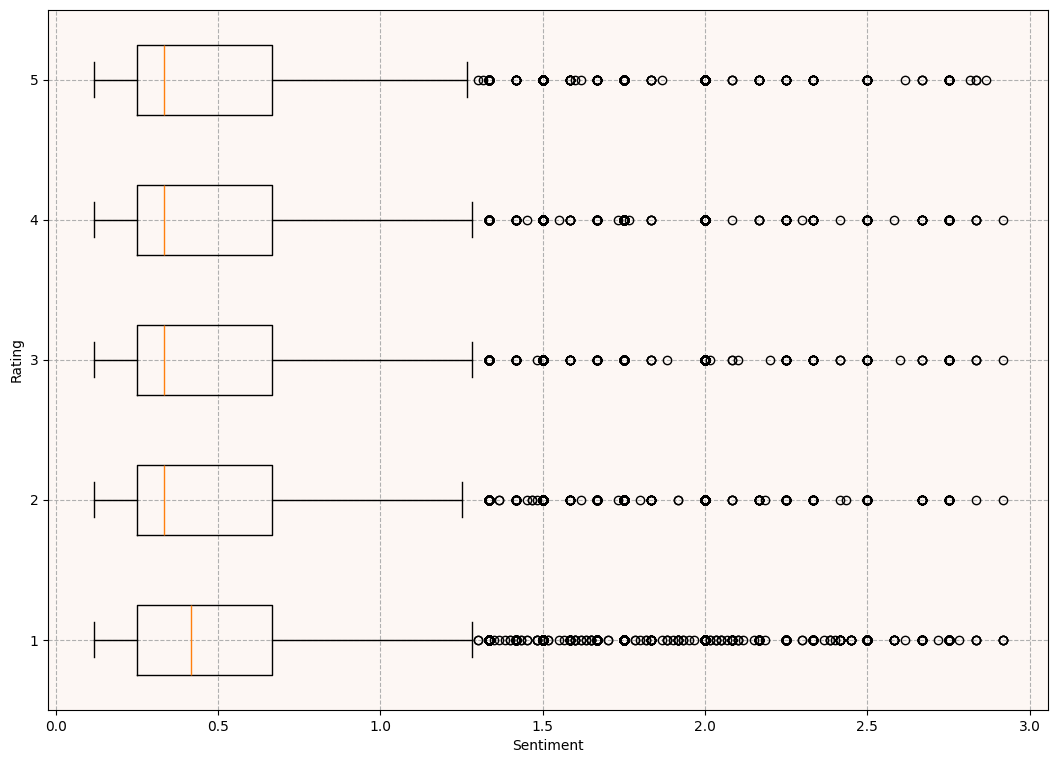

In [142]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
np.random.seed(10)
 
data_1 = np.array(filtered_df[filtered_df["stars"] == 1]["total_time"])
data_2 = np.array(filtered_df[filtered_df["stars"] == 2]["total_time"])
data_3 = np.array(filtered_df[filtered_df["stars"] == 3]["total_time"])
data_4 = np.array(filtered_df[filtered_df["stars"] == 4]["total_time"])
data_5 = np.array(filtered_df[filtered_df["stars"] == 5]["total_time"])

data = [data_1, data_2, data_3, data_4, data_5]

 
fig = plt.figure(figsize =(10, 7))


ax = fig.add_axes([0, 0, 1, 1], facecolor= '#FDF7F4')
X = np.array([-1,1])

bp = ax.boxplot(data, vert = 0)


plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.grid(True, linestyle='--')
plt.sho

#plt.xlim()
plt.ylim(0,6)

# show plot
plt.show()

In [ ]:
time_keywords = ("walk", "out", "left")
filtered_df = df[df['text'].str.contains(time_keywords, case=False, na=False)]

In [145]:
def contains_keywords(text):
    # Define the regular expression pattern to match 'walk' and 'out' together in any order,
    # or 'leave', or 'left'
    pattern = re.compile(
        r'(\bwalk\b.*?\bout\b|\bleave\b|\bleft\b)',
        re.IGNORECASE
    )

    # Search the text for the pattern
    return bool(pattern.search(text))

In [146]:
filtered_df['leave'] = filtered_df['text'].apply(
    lambda x: contains_keywords(x) 
).tolist()


In [148]:
filtered_df_1 = filtered_df[filtered_df["leave"] == False]

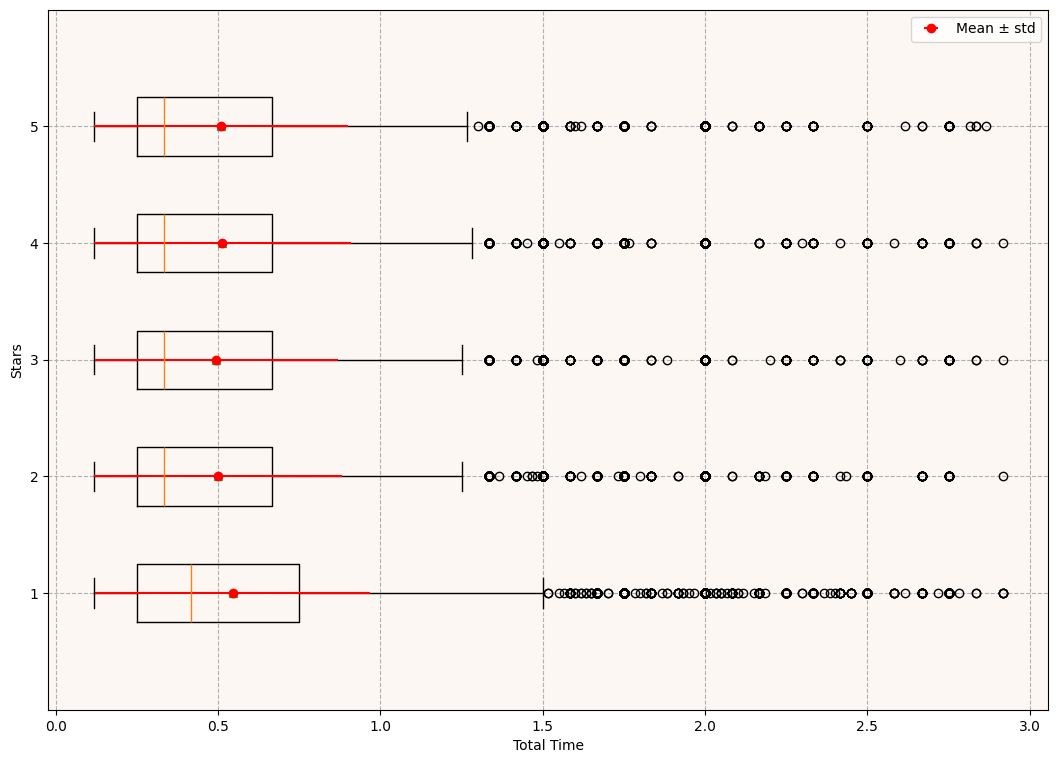

In [149]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'filtered_df' is your DataFrame and it has been properly defined before this code

# Create datasets for each star rating
data = [np.array(filtered_df_1[filtered_df_1["stars"] == i]["total_time"]) for i in range(1, 6)]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#FDF7F4')

# Creating the boxplot with mean lines
bp = ax.boxplot(data, vert=False, showmeans=True)

# Calculate mean and standard deviation for each star rating and plot them
for i in range(len(data)):
    mean = np.mean(data[i])
    std = np.std(data[i])
    ax.errorbar(mean, i + 1, xerr=std, fmt='o', color='r', label='Mean ± std' if i == 0 else "")

plt.xlabel('Total Time')
plt.ylabel('Stars')
plt.grid(True, linestyle='--')
plt.ylim(0, 6)

# Add legend for the mean and std if not already added
if not ax.get_legend():
    ax.legend(loc='upper right')

plt.show()


In [125]:
filtered_df.head(1000).to_csv("filter_text_on_time.csv")

<Axes: ylabel='Frequency'>

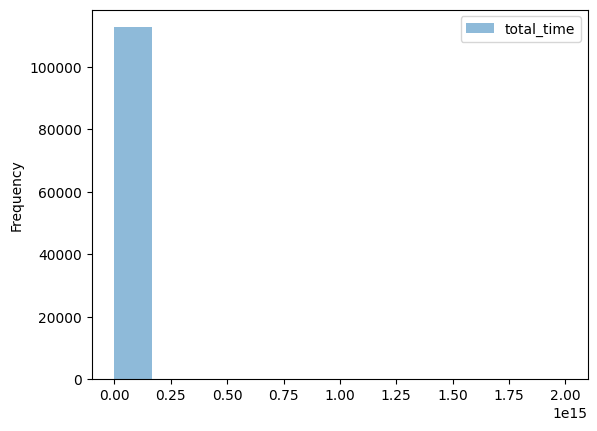

In [87]:
filtered_df.plot.hist(column=["total_time"], bins=12, alpha=0.5)

In [90]:
np.sum(filtered_df["total_time"] > 0.25)

112716

In [92]:
np.max(filtered_df["total_time"])

2000000185749496.0

In [94]:
filtered_df[filtered_df["total_time"] == 2000000185749496]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,first_matching_sentence,contains_number,closest_number_minutes,closest_number_hours,manual_hour,manual_minute,total_time
1160108,3Cc14RfGtNhlq7rxR7H_6g,upVw4mR92QJvA3SbZfRevA,6uT6Py3nhuNuEyMJ_IADZQ,1.0,0,0,0,Sevice wuth NO smile! They had an EMPTY restar...,2018-05-21 23:23:38,Everyone had to wait tfoe a tanle up to 100000...,True,0,1000000092874748,1.000000e+15,NaN,2.000000e+15


In [95]:
filtered_df["first_matching_sentence"][1160108]

'Everyone had to wait tfoe a tanle up to 1000000092874748 hours\n\nMaddie Mutt woild love to say she does NOT appeovee\n\nMustard ketcjup cheesy mutts 1192848ej'